In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

dataset = pd.read_csv('../input/heart-disease-uci/heart.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [2]:
#Encoding Categorical Data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#cp

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [2])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
X = X[:, 1:]
#restecg
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [8])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
X = X[:, 1:]
#slope
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [13])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
X = X[:, 1:]
#ca
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [15])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
X = X[:, 1:]
#thal
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [19])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
X = X[:, 1:]

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data w

In [3]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(XTrain,yTrain)
yPred = classifier.predict(XTest)
cm = confusion_matrix(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.8461538461538461
[[34 10]
 [ 4 43]]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(XTrain,yTrain)
yPred = classifier.predict(XTest)
cm = confusion_matrix(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.8131868131868132
[[32 12]
 [ 5 42]]


In [6]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(XTrain,yTrain)
yPred = classifier.predict(XTest)
cm = confusion_matrix(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.8131868131868132
[[33 11]
 [ 6 41]]


In [7]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as DT
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(XTrain,yTrain)
yPred = classifier.predict(XTest)
cm = confusion_matrix(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.6813186813186813
[[31 13]
 [16 31]]


In [8]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(XTrain,yTrain)
yPred = classifier.predict(XTest)
cm = confusion_matrix(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.8241758241758241
[[34 10]
 [ 6 41]]


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                276       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
212/212 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6462
Epoch 2/20
212/212 [==============================] - 0s 675us/step - loss: 0.4487 - accuracy: 0.8160
Epoch 3/20
212/212 [==============================] - 0s 626us/step - loss: 0.3560 - accuracy: 0.8302
Epoch 4/20
212/212 [==============================] - 0s 601us/step - loss: 0

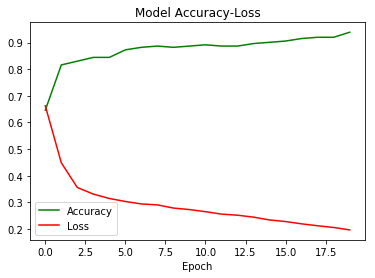

Artificial Neural Network Classifier :
Accuracy =  0.8351648351648352
[[34 10]
 [ 5 42]]


In [9]:
#Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense

#Initialising ANN
classifier = Sequential()

#Adding the first hidden layer or the input layer
classifier.add(Dense(activation='relu',
                     kernel_initializer='uniform',
                     input_dim=22,
                     units=12))
#Adding the second hidden layer
classifier.add(Dense(activation='relu',
                     kernel_initializer='uniform',
                     units=12))
#Adding the output layer
classifier.add(Dense(activation='sigmoid',
                     kernel_initializer='uniform',
                     units=1))

#Compiling the ANN
classifier.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())

#Fitting the ANN
history = classifier.fit(XTrain, yTrain, batch_size=3, epochs=20, verbose=1)
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],'green')
plt.plot(history.history['loss'],'red')
plt.title('Model Accuracy-Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'])
plt.show()

#Predicting the Test set Results
yPred = classifier.predict(XTest)
yPred = (yPred>0.5) #Since output is probability
cm = confusion_matrix(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Artificial Neural Network Classifier :")
print("Accuracy = ", accuracy)
print(cm)